## <img src="images/semana_ciencia.png">

<img src="images/numpy.jpeg">

**Librería fundamental sobre la cual se construye todo el ecosistema científico y de análisis de datos en Python.**

Numpy básicamente ofrece:

- Contenedores homogéneos de datos [arrays]
- Funciones que operan sobre estos contenedores de forma que las operaciones son áltamente eficientes.


Python está organizado en módulos que son archivos con extensión `.py` que contienen funciones, variables y otros objetos. 

Y en paquetes, que son conjuntos de módulos. Cuando queremos utilizar objetos que están definidos en un módulo tenemos que importarlo.

In [ ]:
import numpy as np

<img src="images/matplotlib.png">

Matplotlib es una librería de visualización que produce figures en calidad de publicación en una gran variedad de formatos con muy pocas lineas de código.

Tenemos control de todos los aspectos de la visualización, estilo, fuentes y propiedades que se hacen muy familiares a los usuarios de Matlab.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

---

### Ejemplo 1 - Gráfica simple

In [ ]:
"""1. Definimos una función"""
def f(x):
    return (x**3) * (np.cos(x))


"""2. Definimos un dominio X, esto genera un array de numpy,
en este caso un array unidimensional, es decir un vector"""
x = np.arange(-10, 10, 0.1)

# Para limpiar la salida de una celda, selecciónela, digite
# ESC y, sin soltarlo, pulse la letra R y luego la Y

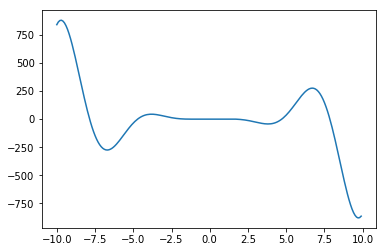

In [12]:
"""3. Evaluamos la función en el array x"""
y = f(x)

"""4. Mostramos la gráfica"""
plt.plot(x, y, label='$x^3 * cos(x)$')

In [ ]:
"""5. Incluir más detalles en la gráfica"""

plt.plot(x, y, label='$x^3 * cos(x)$')
plt.title('Comportamiento de f(x)') 
plt.xlabel('$Dominio$')
plt.ylabel('$Rango_5$')
plt.grid()
plt.legend()
plt.show()

### Ejemplo 2 - ¿Por qué usar arrays?

### Motivo: Eficiencia

- Los bucles son costosos
- Eliminar bucles, **vectorizar** operaciones.
- Los bucles se ejecutan en Python, las operaciones vectorizadas en C
- Las operaciones entre arrays de NumPy se realizan **elemento a elemento**

Ejemplo:

$c_{ij} = a_{ij} + b{ij}$

In [ ]:
help(np.random.rand)

In [14]:
N,M = 100, 100
a = np.random.rand(10000)
a = a.reshape(N, M) # reshape es un método nativo de los arrays de numpy
b = np.random.rand(10000).reshape(N, M)
c = np.empty([100,100])

In [ ]:
%%timeit
for i in range(N):
    for j in range(M):
        c[i,j] = a[i,j] + b[i,j]

In [ ]:
%%timeit
c = a + b

¡1000 veces más rápido! Se hace fundamental **vectorizar** las operaciones y aprovechar al máximo la velocidad de NumPy.

## Constantes y funciones universales

Estas funciones operan sobre números y sobre arrays.

In [ ]:
np.e

In [ ]:
np.pi

In [ ]:
np.log(2)

In [ ]:
np.linalg.norm

## ¿Qué es exactamente un array?

Un array de NumPy es una colección de N elementos, igual que una secuencia en Python (por ejemplo, una lista). Tiene las mismas propiedades que una secuencia y algunas más.
Para crear un array, la forma más directa es pasarle una secuencia a la función `np.array`


In [ ]:
np.array([1, 2, 3, 4, 5])

Los arrays de NumPy son homogéneos, es decir, todos sus elementos son del mismo tipo. Si le pasamos a `np.array` una secuencia con objetos diferentes, promocionará todos al tipo con más información. Para acceder al tipo del array, podemos usar la función `dtype`

In [ ]:
a = np.array([1, 2, 3.0, 4, 5])
a.dtype

NumPy intentará automáticamente construir un array con el tipo adecuado teniendo en cuenta los datos de entrada, aunque nosotros podemos forzarlo.

In [ ]:
np.array([1, 2, 3, 4, 5], dtype=float)

In [ ]:
np.array([1, 2, 3, 4, 5], dtype=complex)

También podemos convertir un array de un tipo a otro utilizando el método `.astype`

In [ ]:
a

In [ ]:
a = a.astype(int)
a

## Atributos y funciones de arrays

Una vez se ha creado un array es posible acceder a información sobre su estado.

In [ ]:
# Forma del array
a.shape

In [ ]:
# Total de bytes que ocupa este array
a.nbytes

In [ ]:
# Número de dimensiones de un array
a.ndim

In [ ]:
# Suma de elementos
a.sum()

In [ ]:
# Mínimo, máximo y media
a.min(), a.max(), a.mean()

## Creación de arrays

#### 1-D:

In [ ]:
a = np.array([1, 2, 3])
a

#### 2-D, 3-D, ...

In [ ]:
b = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12]])
b

In [ ]:
b.ndim

In [ ]:
b.shape

## Funciones para crear arrays

En la práctica, rara vez creamos los arrays de uno en uno...

#### Separación equidistante

In [ ]:
np.arange(10)

In [ ]:
np.arange(0, 1, 0.2) 

#### Separados por el número de puntos

In [ ]:
np.linspace(0, 1, 10)

#### Otros arrays comunes

In [ ]:
np.ones((3,3))

In [ ]:
np.zeros((2,2))

In [ ]:
np.eye(4, 4)

In [ ]:
np.diag(np.array([1,2,3,4]))

#### Números Aleatorios

In [ ]:
np.random.rand(4)  # Uniforme entre [0, 1]

In [ ]:
np.random.randn(4) # Gaussian de Media 0 y Varianza 1

In [ ]:
np.random.randn(4,4)

In [ ]:
np.random.seed(1234)

np.random.rand(4)

### Las imágenes tambien son arrays!

In [ ]:
lena = plt.imread('images/lena.png')
lena

## Indexado de arrays

Una de las herramientas mas importantes a la hora de trabajar con arrays es el indexado. Consiste en seleccionar elementos aislados o secciones de un array. Nosotros vamos a ver la indexación básica, pero existen técnica de indexación avanzada que convierten los arrays en herramientas potentísimas.

#### 1-D Arrays

In [ ]:
a = np.arange(10)
a

In [ ]:
a[0], a[2], a[-1]

In [ ]:
a[::-1]

Para **arrays multidimensionales**, los índices son tuplas de enteros según las dimensiones del array.

In [ ]:
a = np.arange(16).reshape((4,4))
a

En **2D** la primera dimensión corresponde a las **filas**, la segunda a **columnas**

In [ ]:
a[0, 0]

No solo podemos recuperar un elemento aislado, sino tambien porciones del array, utilizando la sintaxis `[<inicio>:<final>:<salto>]`

#### Obtener las dos filas de la mitad

In [ ]:
a[1:3:1, :]

#### Obtener las dos columnas de la mitad

In [ ]:
a[:, 1:3:1]

In [ ]:
plt.imshow(lena, cmap='gray')

In [ ]:
plt.imshow(lena[0:512, 128:384], cmap='gray')

## Operaciones con arrays

### Elemento por elemento

Toda la aritmética funciona elemento por elemento

In [ ]:
a = np.arange(5)
a

In [ ]:
a + 1

In [ ]:
b = np.ones(5)
a - b

*Esto NO es multiplicación de matrices*

In [ ]:
c = np.ones(3)
c * c

### Otras operaciones

#### Comparar arrays

In [ ]:
a = np.array([1, 2, 3, 4, 5, 6, 7])
b = np.array([4, 2, 2, 4, 3, 2, 1])

a == b

In [ ]:
a > b

Podemos usar estas comparaciones como una **mascara** para modificar y acceder a los valores que cumplan la condición.

In [ ]:
a[a > b] = 0
a

#### Funciones universales

In [ ]:
a = np.arange(5)
a

In [ ]:
np.sin(a)

In [ ]:
np.exp(a)

### Reducciones básicas

#### 1-D arrays

In [ ]:
a = np.array([1, 2, 3, 4])

np.sum(a)

In [ ]:
a.sum()

#### Arrays multidimensionales

In [ ]:
a = np.arange(9).reshape((3,3))
a

In [ ]:
# Primera dimensión
a.sum(axis=0)

In [ ]:
# Segunda dimensión
a.sum(axis=1)

### Otras reducciones

Funciona de igual manera con el **axis** y en múltiples dimensiones.

In [ ]:
x = np.array([1, 2, 3, 4])
x.min()

In [ ]:
x.max()

In [ ]:
x.mean()

In [ ]:
x.std()

# Ejercicios

### Ejercicio 1.

1. Crear un array `z1` de 3x4 lleno de ceros de tipo entero.
2. Crear un array `z2` de 3x4 lleno de ceros salvo la primera fila que serán todo unos.
3. Crear un array `z3` de 3x4 lleno de ceros salvo la última fila que será el rango entre 5 y 8

### Ejercicio 2.

1. Crea un vector de 10 elementos, siendo los impares unos y los pares doses.
2. Crea un `tablero de ajedrez`, con unos en las casillas negras y ceros en las blancas.

Puede mostrar el tablero de ajedrez usando `plt.imshow(array)`

## Ejercicio 3.

1. Crea una matriz aleatoria 5x5 y halla los valores mínimo y máximo.
2. Normaliza esa matriz entre 0 y 1

## Broadcasting

Las operaciones básicas (suma, resta, etc.) se hacen elemento por elemento y funciona en arrays de diferente tamaño.

La imagen siguiente da un ejemplo de **broadcasting**

<img src="images/broadcasting.png">

In [ ]:
a = np.array([[0], [10], [20], [30]])
a

In [ ]:
b = np.array([0, 1, 2])
b

In [ ]:
a + b

## Manipulación de formas

### Colapsar

Reducir una matriz de múltiples dimensiones y la colapsa a una dimensión.

In [ ]:
a = np.array([[1, 2, 3], [4, 5, 6]])
a.ravel()

In [ ]:
a.T

In [ ]:
a.T.ravel()

### Reformar

La operación inversa a colapsar.

In [ ]:
b = a.ravel()
b

In [ ]:
b.reshape((2,3))

In [ ]:
b.reshape((3,2))

## Manejo de Archivos

### Archivos de texto

|year|hare|lynx|carrot|
|----|----|----|------|
|1900|30000|    4000|     48300|
|1901|47200|  6100|   48200|
|1902|70200|  9800|   41500|
|1903|77400|  35200|  38200|

In [ ]:
# Leer datos desde archivo
data = np.loadtxt('data/populations.txt')
data


In [ ]:
# Almacenar datos en formato texto
np.savetxt('pop2.txt', data)

### Formato Numpy

Numpy tiene su propio formato binario.

In [ ]:
data = np.ones((3,3))
data

In [ ]:
np.save('data/ones.npy', data)

In [ ]:
data3 = np.load('data/ones.npy')
data3

## Resumen

- Sabe crear arrays: `array`, `arange`, `ones`, `zeros`, `rand`
- Conoce la forma de un array `shape` y los diferentes métodos de indexado para obtener diferente secciones del array `array[::2]`, etc.
- Ajustar la forma de un array usando `reshape` o aplanarla con `ravel`
- Obtener un subconjunto de elementos de un array y modificar sus valores usando mascaras `a[a < 0] = 0`
- Conocer operaciones miscelanes con arrays, encontrar el máximo `array.max()` o la media `array.mean()`, entre otras.
- Tiene una idea básica del **broadcasting** y sus reglas.


## Análisis de Vinos

Usando los resultados de un análisis químico de vinos obtenidos de la misma región en Italia pero de tres diferentes cultivos.

Los atributos del dataset son:

0. Wine (Class)
1. Alcohol 
2. Malic acid 
3. Ash 
4. Alcalinity of ash 
5. Magnesium 
6. Total phenols 
7. Flavanoids 
8. Nonflavanoid phenols 
9. Proanthocyanins 
10. Color intensity 
11. Hue 
12. OD280/OD315 of diluted wines 
13. Proline 

---
#### Truco:
Use `np.set_printoptions(suppress=True, precision=3)` para imprimer los datos de una manera mas legible.


### Ejercicios

1. Lea los datos desde la ruta `data/wine.csv`, use el parámetro `delimiter=','` para valores separados por coma.
2. Determine entre las 3 clases de vinos, cual tiene el mayor promedio de Alcohol.
3. Un vino con concentración de ácido málico mayor a `3.5` se considera demasiado maduro, cuantos vinos tienen una concentración mayor?
4. Usando el comando `plt.hist(array)` cree un histograma de ácido málico.
5. Normalice entre [0,1] los datos de Alcohol e Intensidad de Color
6. Usando el comando `plt.scatter(array1, array2)` cree un gráfico de dispersión de las dos columnas normalizadas.

In [17]:
np.set_printoptions(suppress=True, precision=3)


array([[   1.  ,   14.23,    1.71, ...,    1.04,    3.92, 1065.  ],
       [   1.  ,   13.2 ,    1.78, ...,    1.05,    3.4 , 1050.  ],
       [   1.  ,   13.16,    2.36, ...,    1.03,    3.17, 1185.  ],
       ...,
       [   3.  ,   13.27,    4.28, ...,    0.59,    1.56,  835.  ],
       [   3.  ,   13.17,    2.59, ...,    0.6 ,    1.62,  840.  ],
       [   3.  ,   14.13,    4.1 , ...,    0.61,    1.6 ,  560.  ]])